# Final and PCA - Project Arrhythmia

# Import Required Libraries
- **Functionality:** This cell imports all the necessary Python libraries for the project. This includes libraries for data manipulation (pandas, numpy, scipy), mathematical operations (math), data visualization (seaborn, matplotlib), and machine learning preprocessing and modeling tools from scikit-learn.

In [ ]:
#Importing all the required libraries
from sklearn import set_config
set_config(display="text")
import pandas as pd
import numpy as np
import scipy as sp
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load Dataset
- **Functionality:** This cell loads the arrhythmia dataset from the specified CSV file ("Data/arrhythmia.csv") into a pandas DataFrame. The `header=None` argument is used because the dataset does not contain a header row.

In [ ]:
#Loading the required data
df=pd.read_csv("Data/arrhythmia.csv", header = None)

# Inspect First 5 Rows
- **Functionality:** This cell displays the first 5 rows of the loaded DataFrame using the `.head()` method. This provides a quick preview of the dataset's structure and data.

In [ ]:
#Inspecting the first 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


# Inspect Last 5 Rows
- **Functionality:** This cell displays the last 5 rows of the loaded DataFrame using the `.tail()` method. This is useful for examining the end of the dataset.

In [ ]:
#Inspecting the last 5 rows of the dataset
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


# Check Dataset Dimensions
- **Functionality:** This cell displays the number of rows and columns in the DataFrame using the `.shape` attribute.

In [ ]:
#Inspecting the dimensionality of the dataset
df.shape

(452, 280)

# Get Dataset Information
- **Functionality:** This cell provides a concise summary of the DataFrame, including the data types of each column, the number of non-null values, and memory usage, using the `.info()` method.

In [ ]:
#Obtaining information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


# Get Descriptive Statistics
- **Functionality:** This cell generates descriptive statistics for the numerical columns in the DataFrame, such as mean, standard deviation, minimum, maximum, and quartiles, using the `.describe()` method.

In [ ]:
#Obtaining description of the dataset
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# Count Initial Null Values
- **Functionality:** This cell calculates and displays the total number of null values in the entire DataFrame before any handling of missing data.

In [ ]:
#Inspecting the dataset for null values
pd.isnull(df).sum().sum()

np.int64(0)

# Replace '?' with NaN
- **Functionality:** This cell replaces all occurrences of the character "?" in the DataFrame with `np.nan`, which is the standard representation for missing values in pandas and NumPy.

In [ ]:
#Replacing the "?" in the data with nan method
df = df.replace("?", np.nan)

# Count Null Values After Replacement
- **Functionality:** This cell calculates and displays the total number of null values in the DataFrame after replacing "?" with `np.nan`, confirming the count of missing values.

In [ ]:
#Final counting total number of null values in dataset
nv = pd.isnull(df).sum().sum()
nv

np.int64(408)

# Visualize Null Values per Column
- **Functionality:** This cell generates a line plot showing the total number of null values in each column of the DataFrame. This helps visualize which columns have missing data and to what extent.

Text(0, 0.5, 'Total number of null values in each column')

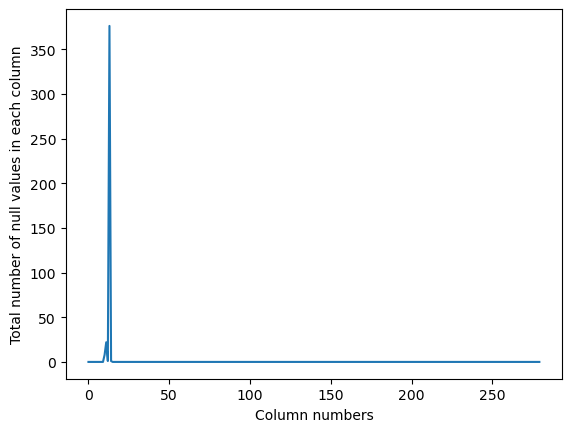

In [ ]:
pd.isnull(df).sum().plot()
plt.xlabel("Column numbers")
plt.ylabel("Total number of null values in each column")

# Zoomed-in View of Null Values
- **Functionality:** This cell generates a line plot showing the number of null values for a specific range of columns (index 7 to 16). This provides a more detailed view of the columns with a noticeable number of missing values.

Text(0, 0.5, 'Total number of null values in each column')

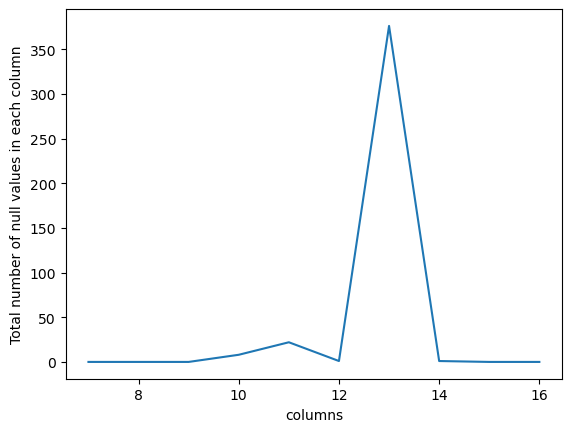

In [ ]:
#Zooming in
pd.isnull(df).sum()[7:17].plot(kind='line')
plt.xlabel('columns')
plt.ylabel('Total number of null values in each column')

# Drop Column 13
- **Functionality:** This cell drops the column with index 13 from the DataFrame in-place, as it was identified as having a large number of missing values.

In [ ]:
#Dropping column 13
df.drop(columns=13, inplace=True)

# Create a Copy of the DataFrame
- **Functionality:** This cell creates a copy of the DataFrame to work with for imputation, preserving the original DataFrame.

In [ ]:
#Making a copy of the dataset (To avoid changes to the main file during imputation)
new_df=df.copy()

# Create Indicator Columns for Missing Values
- **Functionality:** This cell identifies columns with missing values and creates new boolean columns indicating the positions of the missing values. This can be helpful for some imputation strategies or analysis.

In [ ]:
#Making new columns indicating the columns that'll be imputed
cols_with_missing = (col for col in new_df.columns if new_df[col].isnull().any())
for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

# Impute Missing Values
- **Functionality:** This cell uses `SimpleImputer` to replace missing values (`np.nan`) in the DataFrame. By default, it replaces them with the mean of the non-missing values in each column. The result is converted back to a pandas DataFrame with the original column names.

In [ ]:
#Imputation
#my_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

my_imputer = SimpleImputer()
new_df = pd.DataFrame(my_imputer.fit_transform(new_df))
new_df.columns = df.columns

# Inspect Imputed DataFrame (Head)
- **Functionality:** This cell displays the first 5 rows of the DataFrame after missing values have been imputed.

In [ ]:
#Imputed dataframe
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


# Verify No Null Values After Imputation
- **Functionality:** This cell calculates and displays the total number of null values in the DataFrame after imputation, confirming that all missing values have been handled.

In [ ]:
#Dataset with zero null values
pd.isnull(new_df).sum().sum()

np.int64(0)

# Define Final Column Names
- **Functionality:** This cell defines a list of descriptive names for all the columns in the dataset, including the target variable.

In [ ]:
#Creating column names
final_df_columns = ["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom",
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

# Assign Column Names and Save
- **Functionality:** This cell assigns the defined column names to the DataFrame, saves the modified DataFrame to a new CSV file, and displays the first 5 rows with the new column names.

In [ ]:
# Adding column names to dataset

new_df.columns = final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,...,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10.0
3,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1.0
4,75.0,0.0,190.0,80.0,88.0,181.0,360.0,177.0,103.0,-16.0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7.0


# Separate Features and Target Variable
- **Functionality:** This cell separates the target variable ('class') from the rest of the columns in the DataFrame, creating a DataFrame for features (`final_df`) and a Series for the target (`target`).

In [ ]:
target = new_df["class"]
final_df = new_df.drop(columns = 'class')

# Check Shape of Feature DataFrame
- **Functionality:** This cell displays the dimensions (number of rows and columns) of the feature DataFrame (`final_df`).

In [ ]:
final_df.shape

(452, 278)

# Exploratory Data Analysis (EDA) Section
- **Functionality:** This markdown cell marks the beginning of the Exploratory Data Analysis section of the notebook.

# Define Class Names
- **Functionality:** This cell defines a list of human-readable names for the different arrhythmia classes present in the dataset.

In [ ]:
#List with class names
class_names = ["Normal",
               "Ischemic changes (CAD)",
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy",
               "Sinus bradycardy",
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

# Sort DataFrame by Class
- **Functionality:** This cell sorts the DataFrame by the 'class' column, which is helpful for counting instances of each class sequentially.

In [ ]:
t = new_df.sort_values("class")

# Count Instances per Class
- **Functionality:** This cell counts the number of occurrences for each unique class label in the sorted DataFrame and stores the counts in a list.

In [ ]:
#Counting the number of instances for each class
la = t["class"].value_counts(sort=False).tolist()
la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

# Visualize Class Distribution (Count Plot)
- **Functionality:** This cell generates a count plot showing the number of instances for each class. This provides a visual representation of the class distribution and highlights any class imbalance.

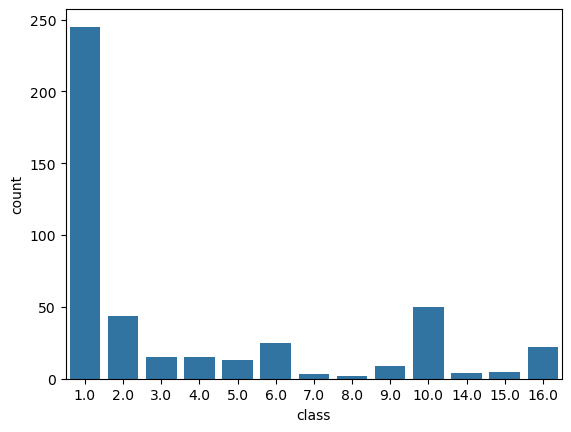

In [ ]:
sns.countplot(x='class', data=new_df)
plt.show()

# Note on Instance Counting
- **Functionality:** This markdown cell serves as a comment indicating that the next steps involve counting the total number of instances for each class.

In [ ]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


# Prepare Class Counts for Pie Chart
- **Functionality:** This cell prepares a list of class counts, potentially adjusting for missing classes in the `la` list to align with the `class_names` list, for use in a pie chart.

# Visualize Class Distribution (Pie Chart)
- **Functionality:** This cell generates a pie chart to visualize the proportion of instances belonging to each class. The counts are transformed using a logarithmic scale for better visualization of smaller classes. A legend with class names and percentages is included.

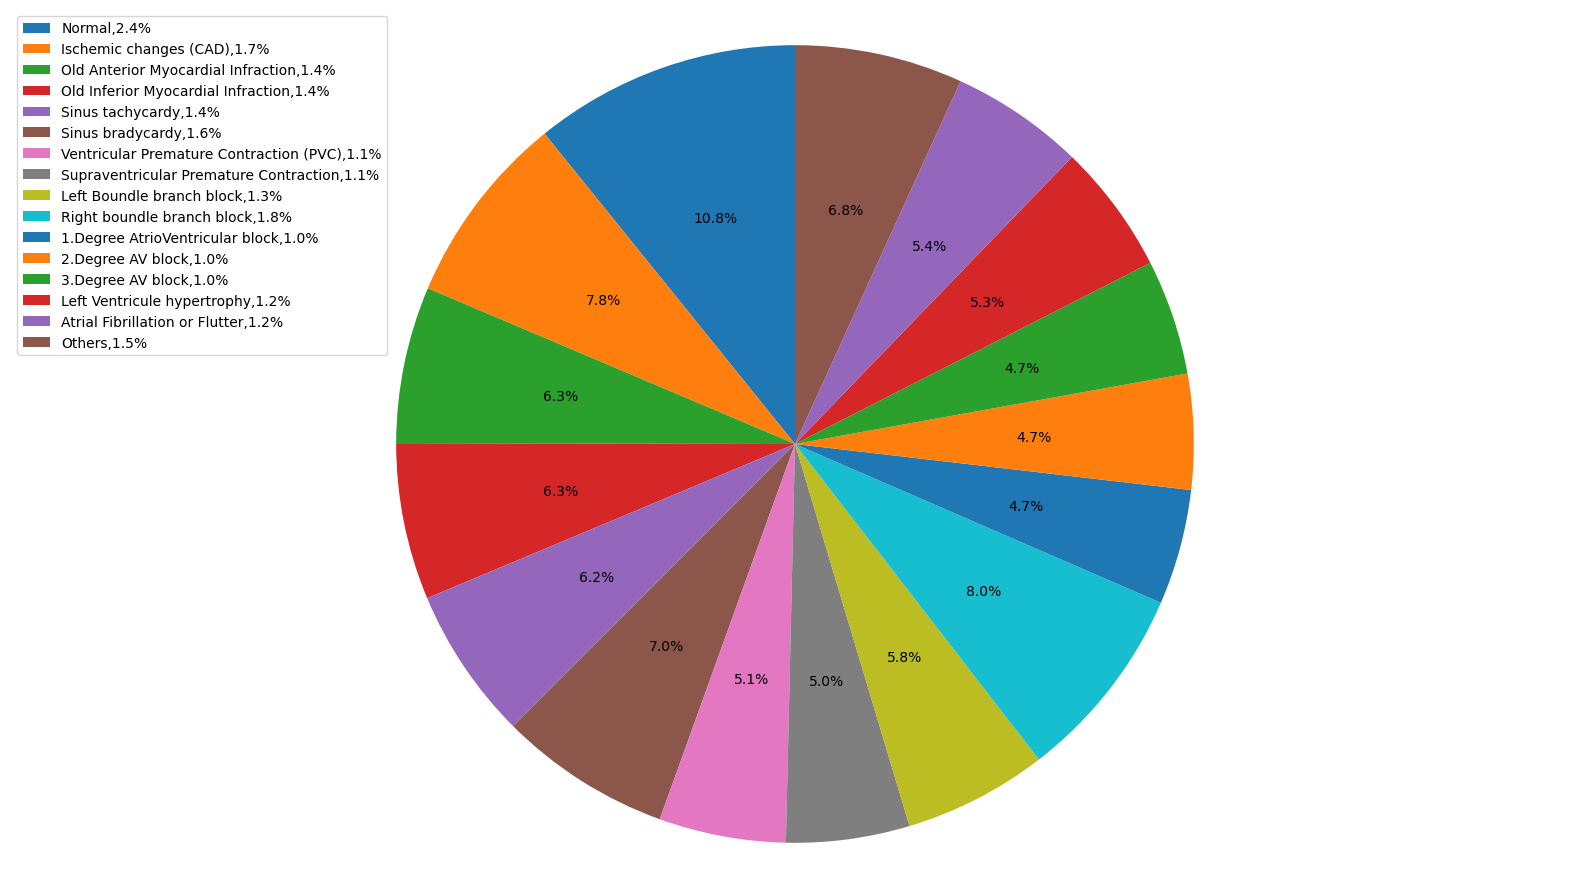

In [ ]:
labels = class_names
Log_Norm = []
for i in values:
  Log_Norm.append(mt.log10(i+11))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle = 90)

leg = plt.legend(loc = 'best', labels=['%s,%1.1f%%' % (l,s) for l,s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

# Outlier Handling and Visualization Section
- **Functionality:** This markdown cell marks the beginning of the section focused on handling outliers and visualizing data distributions.

# Pairwise Relationship and Outlier Visualization (Age, Sex, Height, Weight)
- **Functionality:** This cell creates a grid of scatter plots showing the pairwise relationships between 'Age', 'Sex', 'Height', and 'Weight' features. The points are colored based on 'Sex', which helps in identifying potential outliers and understanding relationships within gender groups.

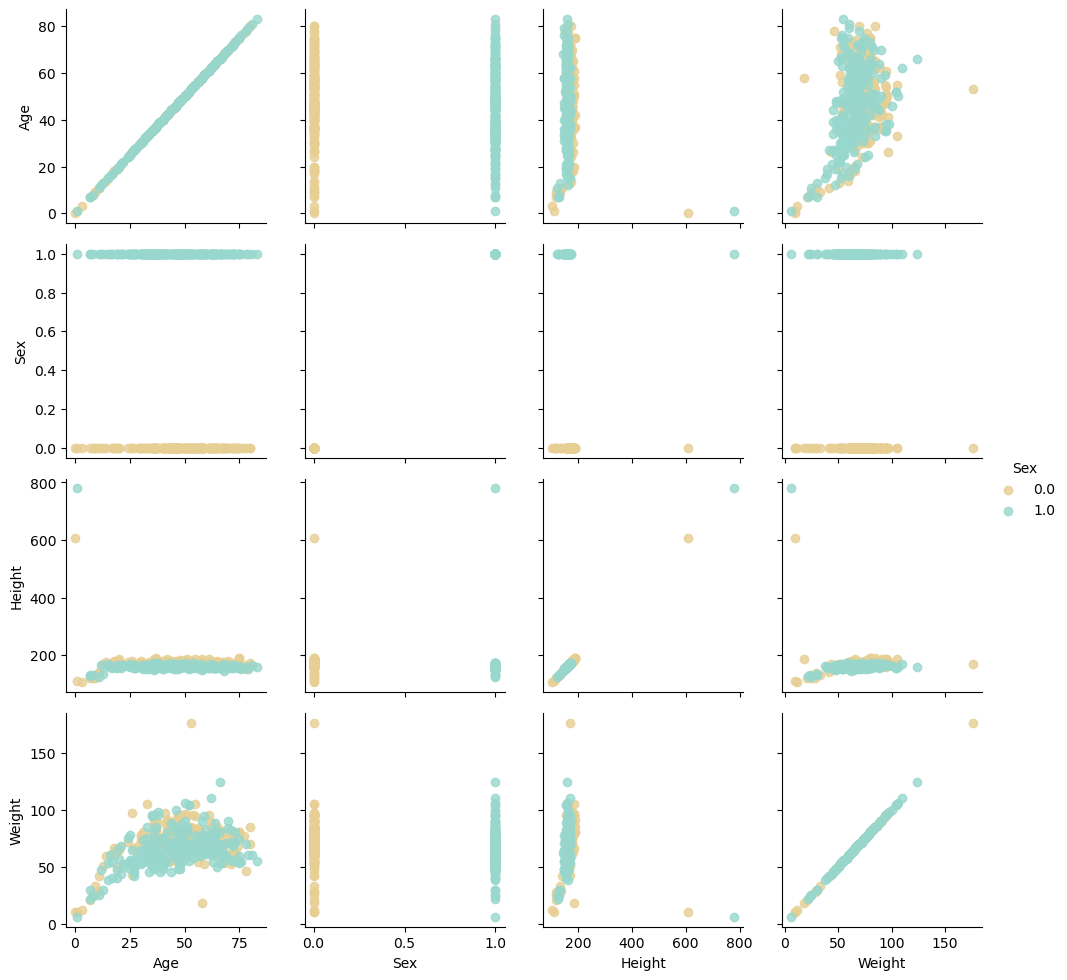

In [ ]:
#Looking for pairwise relationship and outliers
g = sns.PairGrid(final_df, vars = ['Age','Sex','Height','Weight'], hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

# Inspect Top 10 Heights
- **Functionality:** This cell displays the top 10 largest values in the 'Height' column to identify potential outliers.

In [ ]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

# Correct Outlying Height Values
- **Functionality:** This cell replaces specific outlying values in the 'Height' column with more plausible values.

In [ ]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

# Inspect Top 10 Weights
- **Functionality:** This cell displays the top 10 largest values in the 'Weight' column to identify potential outliers.

In [ ]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

# Box Plot of Key ECG Interval Features
- **Functionality:** This cell generates box plots for features related to ECG intervals: 'QRS_Dur', 'P-R_Int', 'Q-T_Int', 'T_Int', and 'P_Int'. These plots help visualize the distribution and identify outliers in these features.

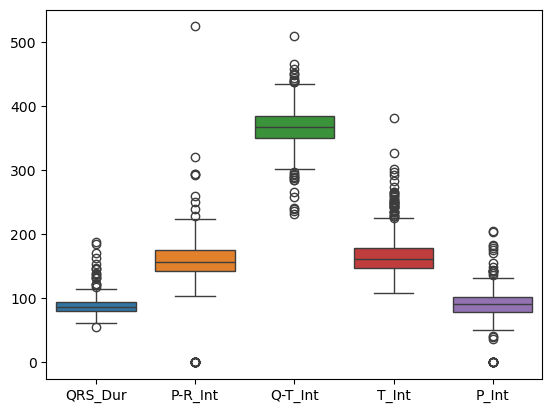

In [ ]:
sns.boxplot(data=final_df[['QRS_Dur','P-R_Int','Q-T_Int','T_Int','P_Int']]);

# Bar Plot of Most Frequent P-R Interval Values
- **Functionality:** This cell creates a bar plot showing the counts of the five most frequent values in the 'P-R_Int' column.

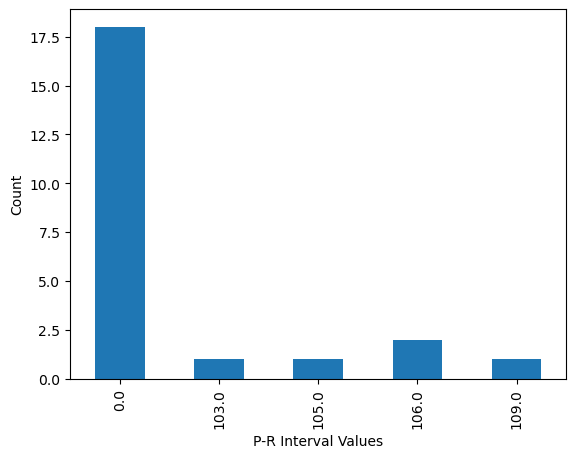

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

# Bar Plot of Least Frequent P-R Interval Values
- **Functionality:** This cell creates a bar plot showing the counts of the five least frequent values in the 'P-R_Int' column.

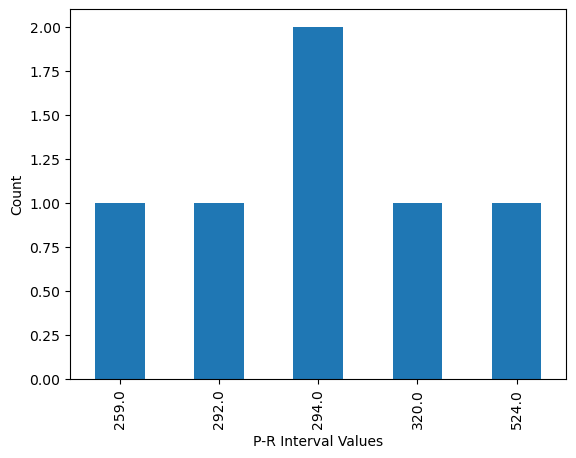

In [ ]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind = 'bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count');

# Box Plot of QRS, T, P, J, and Heart Rate Features
- **Functionality:** This cell generates box plots for the 'QRS', 'T', 'P', 'J', and 'Heart_Rate' features to visualize their distributions and identify outliers.

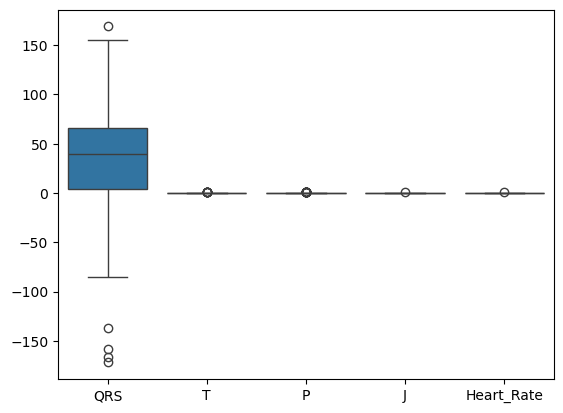

In [ ]:
sns.boxplot(data = final_df[["QRS","T","P","J","Heart_Rate"]]);

# Box Plot of R', S' Wave, Int_Def, and Rag_R_Nom Features
- **Functionality:** This cell generates box plots for the "R'_Wave", "S'_Wave", "Int_Def", and "Rag_R_Nom" features to visualize their distributions and identify outliers.

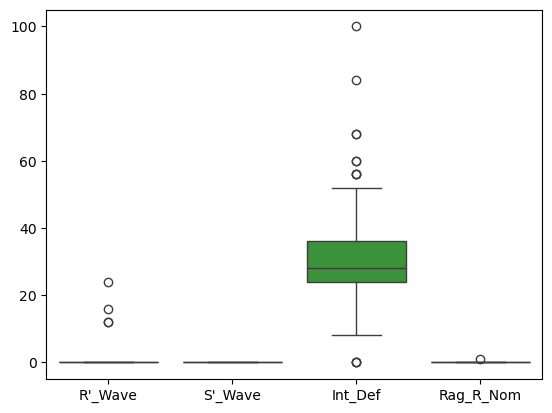

In [ ]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]]);

# Count Values in S' Wave Column
- **Functionality:** This cell counts the occurrences of each unique value in the "S'_Wave" column, confirming that all values are 0.0.

In [ ]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

# Count Values in V101 Column
- **Functionality:** This cell counts the occurrences of each unique value in the "V101" column, an ECG feature, to understand its value distribution.

In [ ]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

# Count Values in V201 Column
- **Functionality:** This cell counts the occurrences of each unique value in the "V201" column, another ECG feature, to understand its value distribution.

In [ ]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

# Count Values in V301 Column
- **Functionality:** This cell counts the occurrences of each unique value in the "V301" column, an ECG feature, to understand its value distribution.

In [ ]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

# Count Values in V501 Column
- **Functionality:** This cell counts the occurrences of each unique value in the "V501" column, an ECG feature, to understand its value distribution.

In [ ]:
final_df["V501"].value_counts().sort_index(ascending=False)

V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

# Box Plot of AVR Lead ECG Features
- **Functionality:** This cell generates box plots for a set of ECG features from the AVR lead (AVR190 to AVR199) to visualize their distributions and identify outliers. The figure size is set for better visibility.

<Axes: >

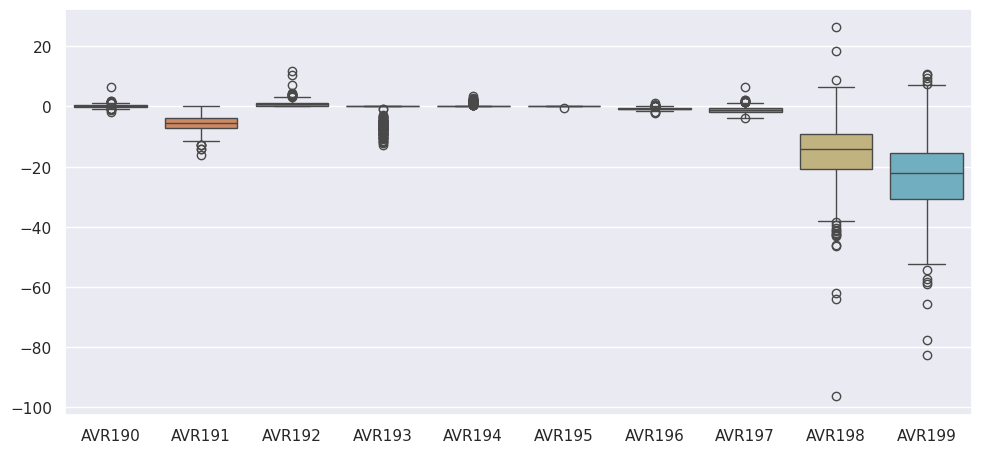

In [ ]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194",
                           "AVR195","AVR196","AVR197","AVR198","AVR199"]])

# Box Plot of AVL Lead ECG Features
- **Functionality:** This cell generates box plots for a set of ECG features from the AVL lead (AVL200 to AVL209) to visualize their distributions and identify outliers. The figure size is set for better visibility.

<Axes: >

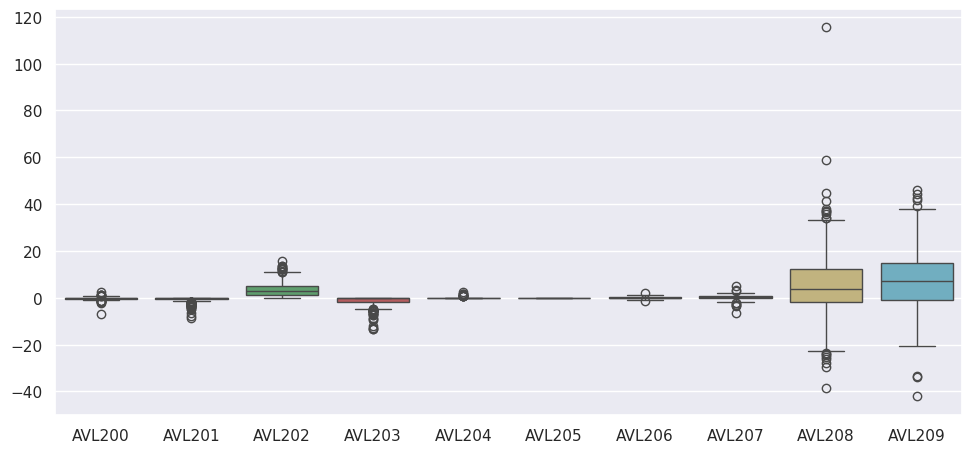

In [ ]:
sns.set(rc={'figure.figsize':[11.7,5.27]})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204",
                           "AVL205","AVL206","AVL207","AVL208","AVL209"]])

# Box Plot of AVF Lead ECG Features
- **Functionality:** This cell generates box plots for a set of ECG features from the AVF lead (AVF210 to AVF219) to visualize their distributions and identify outliers. The figure size is set for better visibility.

<Axes: >

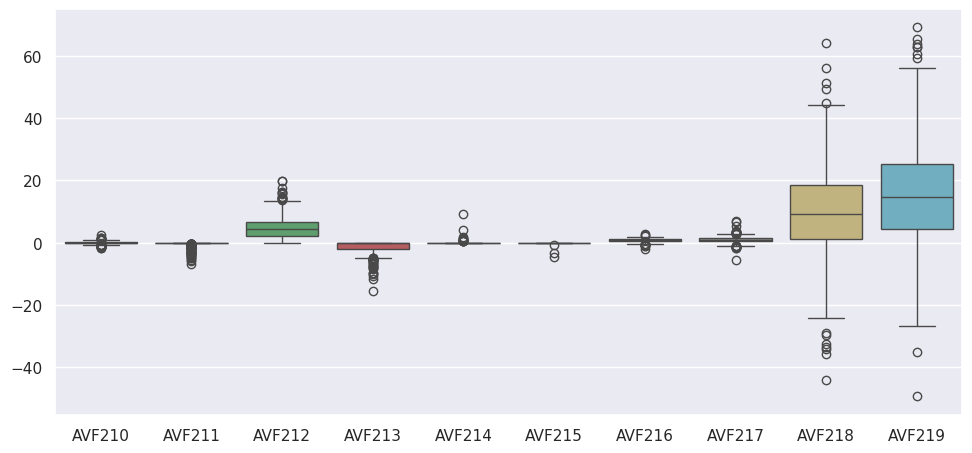

In [ ]:
sns.set(rc={'figure.figsize':(11.7, 5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213",
                           "AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]])

# Calculate Pearson Correlation with Target
- **Functionality:** This cell calculates the Pearson correlation coefficient between each feature in the `final_df` DataFrame and the target variable ('class'). This helps identify features that are linearly related to the target.

In [ ]:
#finding correlation with target feature using pearson correlation

target=new_df["class"]
pearsoncorr = final_df.corrwith(other = target,method='pearson')
pearsoncorr.values

/home/heytanix/.config/jupyterlab-desktop/envs/jupyter1c1/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/heytanix/.config/jupyterlab-desktop/envs/jupyter1c1/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([-9.23812218e-02, -1.78080037e-01, -3.46671442e-02, -9.01507390e-02,
        3.23878728e-01, -9.99540161e-02,  2.83049762e-02,  9.76253981e-02,
       -1.22002504e-01,  1.95854526e-02, -1.68648870e-04,  1.90644217e-01,
       -3.08114850e-02,  3.33672764e-02,  3.96491896e-03,  4.26738126e-02,
        1.95198200e-01,  6.39992472e-02,             nan,  4.27635327e-02,
       -2.01150248e-02,  7.67517615e-03, -3.55694451e-02,  3.20969797e-02,
        3.20969797e-02,  8.30559434e-02, -3.61168680e-03,  4.83674292e-02,
        1.83082712e-01, -1.05049431e-02,  6.65428889e-02,  6.77662940e-02,
        4.17574601e-02,  7.98435069e-02, -2.01150248e-02,  1.69531020e-02,
       -3.60504699e-02, -6.66334979e-04, -2.36687153e-02,  1.16515578e-01,
        8.16735582e-02,  1.44307782e-02, -3.20137575e-02,  8.34076694e-02,
       -3.08114850e-02,  5.14341059e-02, -3.08114850e-02, -8.40208668e-02,
       -1.15446555e-02, -5.76271452e-03,  2.10381327e-02,  1.73243101e-01,
        2.54790200e-03,  

# Split Data into Training and Testing Sets
- **Functionality:** This cell splits the feature DataFrame (`final_df`) and the target variable (`target`) into training and testing sets using `train_test_split`. 80% of the data is allocated for training and 20% for testing, with a fixed random state for reproducibility.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.2, random_state=1)

# Scale Features using StandardScaler
- **Functionality:** This cell scales the features in both the training and testing sets using `StandardScaler`. This transformation standardizes features by removing the mean and scaling to unit variance, which is important for many machine learning algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Ignore Warnings
- **Functionality:** This cell imports the `warnings` module and sets the filter to 'ignore' to prevent warning messages from being displayed during execution.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Import Evaluation Metrics
- **Functionality:** This cell imports various metrics from `sklearn.metrics` and plotting libraries (matplotlib and seaborn) that will be used to evaluate the performance of the machine learning models.

In [ ]:
# importing evaluation metrices.

from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
# from scikitplot.metrics import plot_confusion_matrix,plot_roc
import matplotlib.pyplot as plt
import seaborn as sns

# Model Building Section
- **Functionality:** This markdown cell marks the beginning of the section where different machine learning models are built and evaluated.

# Initialize Results DataFrame
- **Functionality:** This cell initializes an empty pandas DataFrame to store the training and testing accuracy results for each model.

In [ ]:
# will store result of each model.

result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

# KNN Training and Prediction
- **Functionality:** This cell initializes a `KNeighborsClassifier`, trains it on the scaled training data, and makes predictions on the scaled testing data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

# Evaluate KNN Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the KNN classifier.

In [ ]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))
knn_train_recall = recall_score(y_train, knnclassifier.predict(X_train),average="weighted")
knn_test_recall = recall_score(y_test, knnclassifier.predict(X_test),average="weighted")

# Print KNN Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the KNN classifier's predictions on the test set.

In [ ]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6481994459833795
Test Recall score: 0.6483516483516484


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

# Add KNN Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the KNN classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['KNN',knn_train_accuracy,knn_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352


# Train and Predict with Logistic Regression
- **Functionality:** This cell initializes a `LogisticRegression` classifier, trains it on the scaled training data, and makes predictions on the scaled testing data.

In [ ]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression(solver = 'saga', random_state=0)
lgclassifier.fit(X_train, y_train)
y_pred = lgclassifier.predict(X_test)

# Evaluate Logistic Regression Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Logistic Regression classifier.

In [ ]:
lg_train_recall=recall_score(y_train, lgclassifier.predict(X_train), average = 'weighted')
lg_test_recall=recall_score(y_test, lgclassifier.predict(X_test), average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))

# Print Logistic Regression Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Logistic Regression classifier's predictions on the test set.

In [ ]:
print('Train Recall score: {}'
      .format(lg_train_recall))
print('Test Recall score: {}'
      .format(lg_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.9390581717451524
Test Recall score: 0.7802197802197802


array([[46,  2,  0,  0,  0,  2,  0,  0,  0,  0,  2],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 3,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1]])

# Add Logistic Regression Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Logistic Regression classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['Logistic Regression',lg_train_accuracy,lg_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220


# Train and Predict with Decision Tree
- **Functionality:** This cell initializes a `DecisionTreeClassifier`, trains it on the scaled training data, and makes predictions on both the training and testing sets.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state=0, max_depth=5)
dtclassifier.fit(X_train, y_train)
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

# Evaluate Decision Tree Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Decision Tree classifier.

In [ ]:
dt_train_recall=recall_score(y_train, dtclassifier.predict(X_train), average = 'weighted')
dt_test_recall=recall_score(y_test, dtclassifier.predict(X_test), average='weighted')
dt_train_recall = accuracy_score(y_train, y_pred_train)
dt_test_recall = accuracy_score(y_test, y_pred_test)

# Print Decision Tree Recall/Accuracy Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing recall scores (which are assigned accuracy values in this code) and displays the confusion matrix for the Decision Tree classifier's predictions on the test set.

In [ ]:
print("Train Recall Score: {}"
      .format(dt_train_recall))
print("Test Recall Score: {}"
      .format(dt_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall Score: 0.7894736842105263
Test Recall Score: 0.6813186813186813


array([[50,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 5,  1,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0]])

# Add Decision Tree Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Decision Tree classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['Decision Tree',dt_train_recall,dt_test_recall]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319


# Train and Predict with Linear SVM
- **Functionality:** This cell initializes a `LinearSVC` classifier, trains it on the scaled training data, and makes predictions on both the training and testing sets.

In [ ]:
from sklearn.svm import LinearSVC
lsvclassifier = LinearSVC(C=0.01)
lsvclassifier.fit(X_train, y_train)
y_pred_test = lsvclassifier.predict(X_test)
y_pred_train = lsvclassifier.predict(X_train)

# Evaluate Linear SVM Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Linear SVM classifier.

In [ ]:
lsvc_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvc_test_accuracy = accuracy_score(y_test, y_pred_test)
lsvc_train_recall = recall_score(y_train, y_pred_train ,average="weighted")
lsvc_test_recall = recall_score(y_test, y_pred_test, average="weighted")

# Print Linear SVM Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Linear SVM classifier's predictions on the test set.

In [ ]:
print('Train Recall score: {}'
      .format(lsvc_train_recall))
print('Test Recall score: {}'
      .format(lsvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8808864265927978
Test Recall score: 0.7802197802197802


array([[50,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 3,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

# Add Linear SVM Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Linear SVM classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['Linear SVM',lsvc_train_accuracy,lsvc_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220


# Train and Predict with Kernelized SVM
- **Functionality:** This cell initializes an `SVC` classifier with a specified kernel and parameters, trains it on the scaled training data, and makes predictions on both the training and testing sets.

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)
KSVC_clf.fit(X_train, y_train)
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

# Evaluate Kernelized SVM Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Kernelized SVM classifier.

In [ ]:
ksvc_train_recall = recall_score(y_train, y_pred_train ,average="weighted")
ksvc_test_recall = recall_score(y_test, y_pred_test, average="weighted")
ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

# Print Kernelized SVM Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Kernelized SVM classifier's predictions on the test set.

In [ ]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.850415512465374
Test Recall score: 0.7912087912087912


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

# Add Kernelized SVM Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Kernelized SVM classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['Kernalized SVM',ksvc_train_accuracy,ksvc_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209


# Train Random Forest Classifier
- **Functionality:** This cell initializes a `RandomForestClassifier` with specified parameters and trains it on the scaled training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=300, criterion='gini',max_features=100,max_depth=10,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=100, max_leaf_nodes=30,
                       n_estimators=300)

# Evaluate Random Forest Performance
- **Functionality:** This cell makes predictions using the trained Random Forest classifier on both training and testing sets and calculates the accuracy and weighted recall scores for both sets.

In [ ]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)
rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train,y_pred_train,average="weighted" )
rf_test_recall = recall_score(y_test, y_pred_test,average="weighted")

# Print Random Forest Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Random Forest classifier's predictions on the test set.

In [ ]:
print ('Train Recall score: {}'
      .format(rf_train_recall))
print ('Test Recall score: {}'
      .format(rf_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8919667590027701
Test Recall score: 0.7472527472527473


array([[51,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0,  0,  0,  6,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

# Add Random Forest Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Random Forest classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['Random Forest',rf_train_accuracy,rf_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253


# Apply PCA for Dimensionality Reduction
- **Functionality:** This cell initializes a `PCA` object to retain components explaining 98% of the variance, fits it on the scaled training data, and displays the number of principal components selected.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train)
pca.n_components_

np.int64(121)

# Transform Data using PCA
- **Functionality:** This cell applies the fitted PCA transformation to both the scaled training and testing data to reduce their dimensionality.

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Import Cross-validation and Grid Search (Not Used)
- **Functionality:** This cell imports `StratifiedKFold` and `GridSearchCV` from scikit-learn, although these specific tools are not utilized in the subsequent model evaluation cells in this notebook.

In [ ]:
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV

# Train and Predict with KNN on PCA Data
- **Functionality:** This cell initializes a `KNeighborsClassifier`, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnp_clf = KNeighborsClassifier(n_neighbors=5)
knnp_clf.fit(X_train_pca, y_train)
y_pred_train = knnp_clf.predict(X_train_pca)
y_pred_test = knnp_clf.predict(X_test_pca)

# Evaluate KNN with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the KNN classifier applied to the PCA-transformed data.

In [ ]:
knnp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

# Print KNN with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the KNN with PCA classifier's predictions on the test set.

In [ ]:
print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.6454293628808865
Test Recall score: 0.6483516483516484


array([[51,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 6,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

# Add KNN with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the KNN with PCA classifier to the `result` DataFrame.

In [ ]:
result = pd.concat([result, pd.DataFrame([['KNN with PCA',knnp_train_accuracy,knnp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352


In [ ]:
#Logestic Regression with PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
lgp_clf = LogisticRegression(solver='saga',C=0.01)
lgp_clf.fit(X_train_pca, y_train)
y_pred_train = lgp_clf.predict(X_train_pca)
y_pred_test = lgp_clf.predict(X_test_pca)

In [ ]:
lgp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lgp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lgp_train_accuracy = accuracy_score(y_train, y_pred_train)
lgp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(lgp_train_recall))
print('Test Recall score: {}'
      .format(lgp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7839335180055401
Test Recall score: 0.7912087912087912


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1]])

In [ ]:
result = pd.concat([result, pd.DataFrame([['Logistic Regression with PCA',lgp_train_accuracy,lgp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352
0,Logistic Regression with PCA,0.783934,0.791209


In [ ]:
#Linear SVM with PCA

In [ ]:
from sklearn.svm import LinearSVC
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(X_train_pca, y_train)
y_pred_train = LSVC_clf.predict(X_train_pca)
y_pred_test = LSVC_clf.predict(X_test_pca)

In [ ]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.8088642659279779
Test Recall score: 0.8021978021978022


array([[50,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 2,  2,  1,  0,  0,  0,  0,  0,  1,  0,  0]])

In [ ]:
result = pd.concat([result, pd.DataFrame([['Linear SVM with PCA',lsvcp_train_accuracy,lsvcp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352
0,Logistic Regression with PCA,0.783934,0.791209
0,Linear SVM with PCA,0.808864,0.802198


In [ ]:
#Kernel SVM with PCA

In [ ]:
from sklearn import svm
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(X_train_pca, y_train)
y_pred_train = KSVC_clf.predict(X_train_pca)
y_pred_test = KSVC_clf.predict(X_test_pca)

In [ ]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall Score: {}'
      .format(ksvcp_train_recall))
print('Test Recall Score: {}'
      .format(ksvcp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall Score: 0.8393351800554016
Test Recall Score: 0.8021978021978022


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = pd.concat([result, pd.DataFrame([['Kernalized SVM with PCA',ksvcp_train_accuracy,ksvcp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352
0,Logistic Regression with PCA,0.783934,0.791209
0,Linear SVM with PCA,0.808864,0.802198
0,Kernalized SVM with PCA,0.839335,0.802198


In [ ]:
#Decision Tree Classifier with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(X_train_pca, y_train)
y_pred_train = dt_clf.predict(X_train_pca)
y_pred_test = dt_clf.predict(X_test_pca)

In [ ]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 0.7534626038781164
Test Recall score: 0.6043956043956044


array([[46,  4,  0,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 4,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  0,  0,  0,  1,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 6,  1,  1,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = pd.concat([result, pd.DataFrame([['Decision Tree with PCA',dtp_train_accuracy,dtp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352
0,Logistic Regression with PCA,0.783934,0.791209
0,Linear SVM with PCA,0.808864,0.802198
0,Kernalized SVM with PCA,0.839335,0.802198


In [ ]:
# random Forest Classifier with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier()
rfp_clf.fit(X_train_pca, y_train)
y_pred_train = rfp_clf.predict(X_train_pca)
y_pred_test = rfp_clf.predict(X_test_pca)

In [ ]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [ ]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))
confusion_matrix(y_test, y_pred_test)

Train Recall score: 1.0
Test Recall score: 0.6813186813186813


array([[52,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [ ]:
result = pd.concat([result, pd.DataFrame([['Random Forest with PCA',rfp_train_accuracy,rfp_test_accuracy]],columns=['Model','Train Accuracy','Test Accuracy'])])
result

,Model,Train Accuracy,Test Accuracy
0,KNN,0.648199,0.648352
0,Logistic Regression,0.939058,0.780220
0,Decision Tree,0.789474,0.681319
0,Linear SVM,0.880886,0.780220
0,Kernalized SVM,0.850416,0.791209
0,Random Forest,0.891967,0.747253
0,KNN with PCA,0.645429,0.648352
0,Logistic Regression with PCA,0.783934,0.791209
0,Linear SVM with PCA,0.808864,0.802198
0,Kernalized SVM with PCA,0.839335,0.802198


# Principal Component Analysis (PCA) Section
- **Functionality:** This markdown cell marks the beginning of the section applying Principal Component Analysis for dimensionality reduction.

In [ ]:
#Result

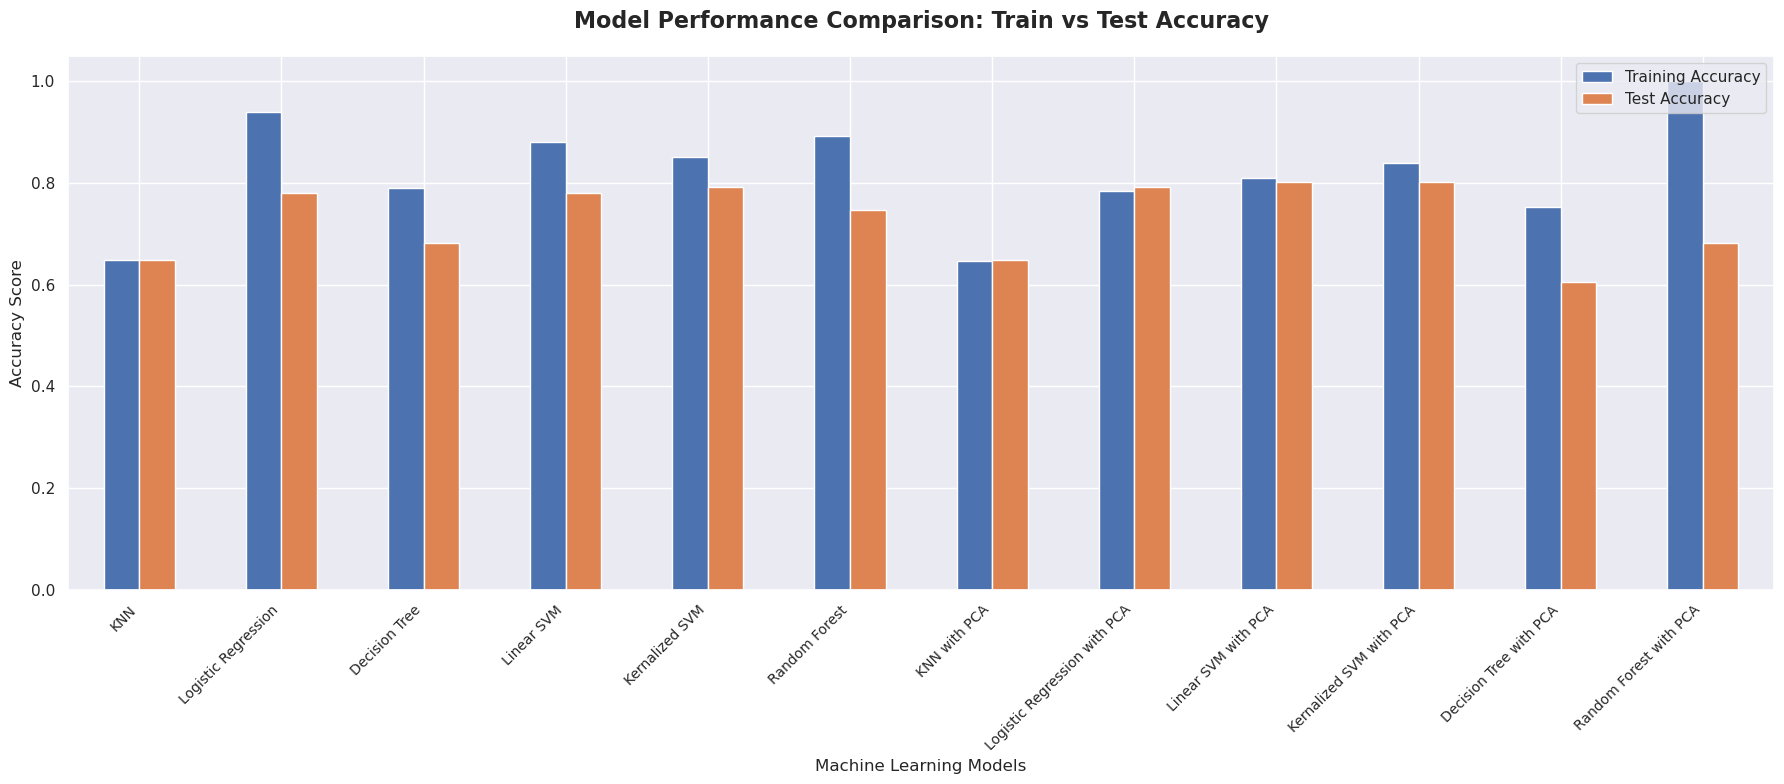

In [ ]:
result = result.set_index('Model')
ax = result.plot(kind="bar", figsize=(18, 8))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Model Performance Comparison: Train vs Test Accuracy',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()

# Logistic Regression with PCA
- **Functionality:** This markdown cell indicates the implementation and evaluation of a Logistic Regression classifier on the PCA-transformed data.

# Train and Predict with Logistic Regression on PCA Data
- **Functionality:** This cell initializes a `LogisticRegression` classifier, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

# Evaluate Logistic Regression with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Logistic Regression classifier applied to the PCA-transformed data.

# Print Logistic Regression with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Logistic Regression with PCA classifier's predictions on the test set.

# Add Logistic Regression with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Logistic Regression with PCA classifier to the `result` DataFrame.

# Linear SVM with PCA
- **Functionality:** This markdown cell indicates the implementation and evaluation of a Linear Support Vector Machine classifier on the PCA-transformed data.

# Train and Predict with Linear SVM on PCA Data
- **Functionality:** This cell initializes a `LinearSVC` classifier, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

# Evaluate Linear SVM with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Linear SVM classifier applied to the PCA-transformed data.

# Print Linear SVM with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Linear SVM with PCA classifier's predictions on the test set.

# Add Linear SVM with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Linear SVM with PCA classifier to the `result` DataFrame.

# Kernelized SVM with PCA
- **Functionality:** This markdown cell indicates the implementation and evaluation of a Kernelized Support Vector Machine classifier on the PCA-transformed data.

# Train and Predict with Kernelized SVM on PCA Data
- **Functionality:** This cell initializes an `SVC` classifier with a specified kernel and parameters, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

# Evaluate Kernelized SVM with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Kernelized SVM classifier applied to the PCA-transformed data.

# Print Kernelized SVM with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Kernelized SVM with PCA classifier's predictions on the test set.

# Add Kernelized SVM with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Kernelized SVM with PCA classifier to the `result` DataFrame.

# Decision Tree with PCA
- **Functionality:** This markdown cell indicates the implementation and evaluation of a Decision Tree classifier on the PCA-transformed data.

# Train and Predict with Decision Tree on PCA Data
- **Functionality:** This cell initializes a `DecisionTreeClassifier`, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

# Evaluate Decision Tree with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Decision Tree classifier applied to the PCA-transformed data.

# Print Decision Tree with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Decision Tree with PCA classifier's predictions on the test set.

# Add Decision Tree with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Decision Tree with PCA classifier to the `result` DataFrame.

# Random Forest with PCA
- **Functionality:** This markdown cell indicates the implementation and evaluation of a Random Forest classifier on the PCA-transformed data.

# Train and Predict with Random Forest on PCA Data
- **Functionality:** This cell initializes a `RandomForestClassifier`, trains it on the PCA-transformed training data, and makes predictions on both the transformed training and testing sets.

# Evaluate Random Forest with PCA Performance
- **Functionality:** This cell calculates the training and testing accuracy and weighted recall scores for the Random Forest classifier applied to the PCA-transformed data.

# Print Random Forest with PCA Recall Scores and Confusion Matrix
- **Functionality:** This cell prints the training and testing weighted recall scores and displays the confusion matrix for the Random Forest with PCA classifier's predictions on the test set.

# Add Random Forest with PCA Results to DataFrame
- **Functionality:** This cell adds the training and testing accuracy of the Random Forest with PCA classifier to the `result` DataFrame.

# Model Performance Results Section
- **Functionality:** This markdown cell marks the beginning of the section presenting the performance results of the different models.

# Visualize Model Performance Comparison
- **Functionality:** This cell sets the 'Model' column as the index of the `result` DataFrame and generates a bar plot comparing the training and testing accuracy of all the evaluated models. The plot is customized for clarity and readability.